# Testiranje domnev
Postopek za testiranje domnev:
 1. Postavimo ničelno in alternativno domnevo $H_0$ in $H_a$
 2. Zberemo podatke in izračunamo testno statistiko (TS)
 3. Določimo kritično območje za testno statistiko
 4. Sklepamo
Vsak od teh korakov je opisan podrobneje v nadaljevanju.

## Naloga: povprečna višina
Preveriti želimo, ali je povprečna telesna višina moškega študenta enaka $180$cm. Postavimo dve domnevi
 * ničelno domnevo: $H_0: \mu=180$cm
 * alternativno domnevo: $H_a: \mu \not=180$cm
 
s testom bomo preverili, kako se ničelna domneva ujema z zbranimi podatki.

In [1]:
x = [180, 183, 173, 171, 180, 183, 172, 178, 188, 175, 183, 179, 185, 195, 169]

In [2]:
from statistics import mean, stdev

In [3]:
xp = mean(x)
xp

179.6

In [4]:
s = stdev(x)
s

6.987744373442078

### Testna statistika
Če testiramo $H_0: \mu = \mu_0$, potem je testna statistika ena od naslednjih možnosti:
 * če $\sigma$ ne poznamo $$TS = \frac{\bar{x}-\mu_0}{s}\sqrt{n}\sim Student(n-1)$$
 * če $\sigma$ poznamo $$TS = \frac{\bar{x}-\mu_0}{\sigma}\sqrt{n}\sim N(0,1)$$

In [6]:
from math import sqrt
mu_0 = 180
n = len(x)
TS = (xp - mu_0)/s*sqrt(n)
TS

-0.22170148987861085

#### Kritično območje
Kritično območje je interval „nenavadnih vrednosti“ za dano porazdelitev. Kritično območje je odvisno od stopnje značilnosti $\alpha$.
 * dvostranski test $H_a: \mu\not=\mu_0$ je kritično območje $(-\infty, -w_k] \cup [w_k, \infty)$
 * za enostranski test $Ha: \mu>\mu_0$ je kritično območje $[w_k, \infty)$
 
Rob kritičnega območja $w_k$ določimo kot kvantil za
 * dvostranski test: kvatnil za $1-\frac{\alpha}{2}$ se pravi $w_k = t_{1-\frac{\alpha}{2}}(n-1)$
 * enostranski test: kvantil za $1-\alpha$ se pravi $w_k = t_{1-\alpha}(n-1)$

In [7]:
# Studentova porazdelitev
from scipy.stats import t

In [9]:
alfa = 0.1 # 10 procentov
wk = t.ppf(1-alfa/2, n-1)
print("Kritično območje: (-neskončno, {}] U [{}, neskončno)".format(-wk,wk))

Kritično območje: (-neskončno, -1.7613101357748562] U [1.7613101357748562, neskončno)


### Sklep

 * Če je testna statistika v kritičnem območju $TS\in W_k$, potem $H_0$ zavrnemo v prid $H_a$
 * Če testna statistika ni v kritičnem območju, potem $H_0$ ne moremo zavrniti (podatki so skladni s $H_0$)

Torej: podatki so skladni z domnevo, da je $\mu=180$cm

## Testiranje $\sigma$

V tovarni proizvajajo cevi izbrane dolžine.  Trdijo, da je standardna napaka izdelane
cevi  manjša  od  1.2cm.   Na  25  ceveh  dobimo  vzorčni  odklon  1.5cm.   Ali  lahko  na
podlagi vzorca pri 

α = 0.05 

zavrnemo trditev tovarne?  Kaj pa na vzorcu 101 cevi?

In [10]:
sigma_0 = 1.2
s = 1.5
n = 25
alfa = 0.05

### 1. Postavimo domneve

 * ničelna domneva: $H_0: \sigma=1.2$
 * alternativna domneva $H_a: \sigma > 1.2$

### 2. Vzorčenje in testna statistika TS
$TS = (n-1)\frac{s^2}{\sigma_0^2}\sim \chi^2(n-1)$ 

In [11]:
TS = s**2/sigma_0**2*(n-1)
print("Vrednost testne statistike je {}".format(TS))

Vrednost testne statistike je 37.5


### 3. Kritično območje
Ali je $TS$ normalna? Primerjamo jo s kvantili za $\chi^2(n-1)$

Kritično območje je interval $[\chi^2_{1-\alpha}(n-1), \infty)$

In [12]:
from scipy.stats import chi2

In [13]:
wk = chi2.ppf(1-alfa, n-1)

In [14]:
print("Kritično območje je [{}, neskončno)".format(wk))

Kritično območje je [36.4150285018073, neskončno)


### 4. Sklep
Testna statistika **leži** v kritičnem območju, to pomeni, da $H_0$ zavrnemo v prid $H_a$.

### Volitve 2018
Ali lahko na podlagi [ankete](http://www.delo.si/assets/media/other/20180311//politbarometer_marec2018copy.pdf) sklepamo, da se bo Desus prebil v parlament.

In [21]:
p_desus = 0.032
p_levica = 0.049
p_sls = 0.025
n = 1010
p_neodloceni = 0.25

In [18]:
p0 = 0.04*0.75/1
p0

0.03

### 1. postavimo domneve
 * $H_0: p_{sls} = 0.03$
 * $H_a: p_{sls} < 0.03$

### 2. Testna statistika
Za delež je TS

$$TS = (p-p_0)\sqrt{\frac{n}{p_0(1-p_0)}}\sim N(0,1)$$

In [27]:
TS_sls = (p_sls - p0)*sqrt(n/(p0*(1 - p0)))
TS_sls
TS_levica = (p_levica - p0)*sqrt(n/(p0*(1 - p0)))
TS_levica
TS_desus = (p_desus - p0)*sqrt(n/(p0*(1 - p0)))
print("SLS: {}, Desus: {}, Levica: {}".format(TS_sls, TS_desus, TS_levica))

SLS: -0.9315028687565687, Desus: 0.372601147502628, Levica: 3.5397109012749635


### 3. Kritično območje

In [4]:
alfa = 0.01
from scipy.stats import norm
wk = norm.ppf(1 - alfa)
print("Kritično območje: (-neskončno, {})".format(-wk))

Kritično območje: (-neskončno, -2.3263478740408408)


### 4. Sklep
Testna statistika ni v kritičnem območju, $H_0$ zavrnemo in ne moremo s stopnjo značilnosti $\alpha$ trditi, da se SLS ne bo uvrstila v parlament.

## Testiranje razlike deležev

Testna statistika je

$$ TS= \frac{p_1 - p_2 - p_0}{\sqrt{p_1(1-p_1)/m + p_2(1-p_2)/n}} \sim N(0,1)$$

In [3]:
p_1 = 47/125
p_2 = 52/153
m = 125
n = 153
p_0 = 0
TS = (p_1 - p_2 - p_0)/(p_1*(1 - p_1)/m + p_2*(1 - p_2)/n)**0.5
print("Testna statistika: {}".format(TS))

Testna statistika: 0.6248609698956132


### Kritično območje
$w_k=z_{1-\alpha/2}$

In [7]:
alfa = 0.05
w_k = norm.ppf(1-alfa/2)
print("Kritično območje je (-oo, -{0}] unija [{0},oo)".format(w_k))

Kritično območje je (-oo, -1.959963984540054] unija [1.959963984540054,oo)


#### Sklep
$H_0$ ne moremo zavrniti

# Testiranje porazdelitve

Testna statiskika za testiranje porazdelitve
 $$TS = \sum_{i=1}^r \frac{(N_i - \hat{N_i})^2}{\hat{N_i}}\sim\chi^2(r-1),$$
 
kjer so 
 * $N_i$ izmerjene frekvence, 
 * $\hat{N_i}$ so pa frekvence, kot jih predvideva porazdelitev (teoretične frekvence).

### Naloga
Dvestokrat vržemo kocko in dobimo frekvence izidov kot so v tabeli. Ali lahko z $\alpha=0.05$ trdimo, da kocka ni poštena.

In [9]:
x = [1, 2, 3, 4, 5, 6]
f = [35, 23, 33, 50, 27, 32]

<Container object of 6 artists>

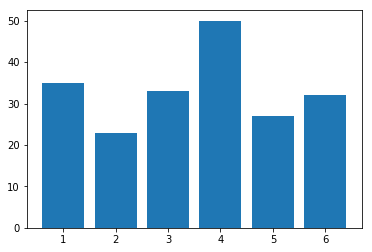

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(x,f)

#### Histogrami vzorcev za enakomerno porazdelitev

In [15]:
from random import choice

In [44]:
n = sum(f)
vzorec = [choice(x) for i in range(n)]
vzorec

[5,
 3,
 2,
 1,
 1,
 5,
 5,
 3,
 4,
 1,
 6,
 4,
 6,
 5,
 5,
 1,
 2,
 1,
 6,
 1,
 6,
 3,
 4,
 5,
 3,
 4,
 4,
 2,
 4,
 4,
 2,
 1,
 6,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 6,
 3,
 1,
 3,
 2,
 4,
 3,
 5,
 2,
 6,
 3,
 2,
 3,
 2,
 6,
 5,
 4,
 5,
 3,
 3,
 1,
 5,
 6,
 4,
 6,
 2,
 1,
 1,
 4,
 2,
 2,
 2,
 6,
 1,
 2,
 4,
 3,
 4,
 5,
 2,
 5,
 1,
 4,
 6,
 4,
 1,
 4,
 1,
 4,
 5,
 2,
 1,
 4,
 5,
 6,
 4,
 1,
 5,
 1,
 4,
 6,
 4,
 5,
 1,
 5,
 1,
 3,
 3,
 3,
 1,
 5,
 5,
 4,
 4,
 2,
 2,
 2,
 4,
 2,
 1,
 6,
 1,
 4,
 5,
 4,
 2,
 6,
 3,
 1,
 4,
 5,
 2,
 3,
 1,
 6,
 4,
 5,
 4,
 5,
 1,
 3,
 2,
 3,
 4,
 6,
 6,
 2,
 1,
 4,
 1,
 3,
 6,
 4,
 2,
 5,
 3,
 3,
 5,
 1,
 4,
 2,
 6,
 4,
 2,
 5,
 5,
 4,
 6,
 6,
 5,
 6,
 3,
 4,
 6,
 4,
 2,
 5,
 5,
 4,
 1,
 6,
 4,
 4,
 1,
 5,
 1,
 3,
 1,
 6,
 5,
 2,
 3,
 1,
 4,
 1,
 5,
 2,
 4,
 4]

<Container object of 6 artists>

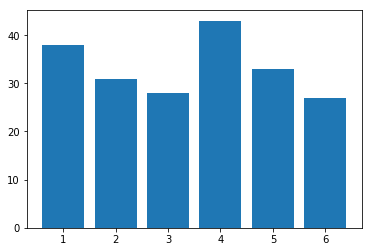

In [45]:
# frekvence
f_v = [vzorec.count(i) for i in x]
plt.bar(x,f_v)

### Domneve

 * $H_0$: X porazdeljen enakomerno $X\sim\begin{pmatrix}1 & 2 & 3& 4& 5&6\\ 1/6 &1/6 &1/6 &1/6 &1/6 &1/6 \end{pmatrix}$
 * $H_a$: X ni porazdeljen enakomerno.

### Teoretične frekvence

In [46]:
f_0 = [1/6*n for i in x]
f_0

[33.33333333333333,
 33.33333333333333,
 33.33333333333333,
 33.33333333333333,
 33.33333333333333,
 33.33333333333333]

### Testna statistika
Testna statiskika za testiranje porazdelitve
 $$TS = \sum_{i=1}^r \frac{(N_i - \hat{N_i})^2}{\hat{N_i}}\sim\chi^2(r-1),$$
 

In [47]:
TS = sum((f[i] - f_0[i])**2/f_0[i] for i in range(6))
TS

12.880000000000003

### Kritično območje
Kritično območje je enostransko 
$$ [\chi^2_{1-\alpha}(r-1), \infty)$$

In [50]:
from scipy.stats import chi2
r = len(x)
w_k = chi2.ppf(1 - alfa, r-1)
print("kritično območje je [{}, oo)".format(w_k))

kritično območje je [11.070497693516351, oo)


### Sklep
Testna statistika je v kritičnem območju, zato $H_0$ zavrnemo. Kocka ni poštena.

## Testiranje zvezne porazdelitve
Za 100 meritev slučajne spremenljivke X dobimo vrednosti zbrane v tabeli

In [52]:
x = [10, 14, 18, 22, 26, 30]
f = [2, 3, 26, 30, 27, 8, 4]

<Container object of 7 artists>

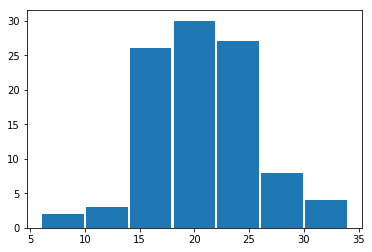

In [57]:
# histogram
plt.bar([8]+[y+2 for y in x], f, width=3.8)

### Teoretične frekvence
$H_0: X\sim N(20,5)$

In [61]:
from numpy import Inf

In [63]:
meje = [-Inf] + x + [Inf]

In [71]:
# verjetnost na 1. intervalu
p = [ norm.cdf(meje[i + 1], 20, 5) - norm.cdf(meje[i], 20, 5) for i in range(len(meje)-1)]
p

[0.022750131948179195,
 0.092319538273529025,
 0.2295085881679676,
 0.31084348322064836,
 0.2295085881679676,
 0.092319538273529012,
 0.022750131948179209]

In [72]:
sum(p)

1.0

In [82]:
n = sum(f)
f_0 = [n*pp for pp in p]
f_0

[2.2750131948179195,
 9.2319538273529034,
 22.95085881679676,
 31.084348322064837,
 22.95085881679676,
 9.2319538273529016,
 2.2750131948179209]

<Container object of 7 artists>

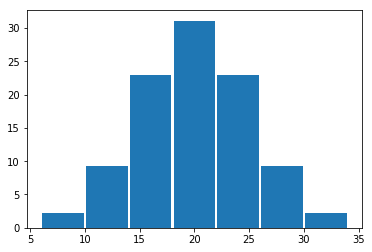

In [83]:
plt.bar([8]+[y+2 for y in x], f_0, width=3.8)

#### Testna statistika

In [84]:
TS = sum((f[i] - f_0[i])**2/f_0[i] for i in range(len(f)))
TS

6.8697072622284816

In [76]:
f

[2, 3, 26, 30, 27, 8, 4]

In [78]:
f_0

[4.5500263896358391,
 18.463907654705807,
 45.90171763359352,
 62.168696644129675,
 45.90171763359352,
 18.463907654705803,
 4.5500263896358417]

In [81]:
sum(f)

100

In [87]:
f_1 = [sum(f[:2])] + f[2:-2] + [sum(f[-2:])]
f_1

[5, 26, 30, 27, 12]

In [88]:
f_01 = [sum(f_0[:2])] + f_0[2:-2] + [sum(f_0[-2:])]
f_01

[11.506967022170823,
 22.95085881679676,
 31.084348322064837,
 22.95085881679676,
 11.506967022170823]

In [91]:
TS = sum((f_1[i] - f_01[i])**2/f_01[i] for i in range(len(f_1)))
TS

4.8579854087168934

### Kritično območje

In [93]:
wk = chi2.ppf(1 - alfa, len(f_1)-1)
wk

9.487729036781154

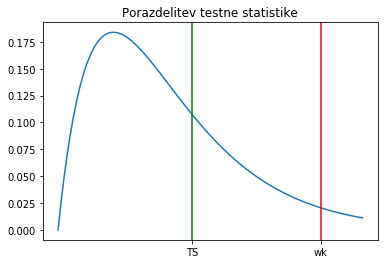

In [105]:
import numpy as np
t = np.linspace(0,11, 100)
plt.plot(t, chi2.pdf(t, 4))
plt.axvline(x = wk, color="r")
plt.axvline(x = TS, color="g")
plt.xticks((TS, wk), ("TS", "wk"))
plt.title("Porazdelitev testne statistike")

### Sklep
Testna statistika ni v kritičnem območju, $H_0$ ne moremo zavrniti, vzorec je skladen s predpostavko, da je $X\sim N(20,5)$

#### P vrednost
p-vrednost je verjetnost, da je testna statistika večja kot dobljena vrednost na danem vzorcu.

In [108]:
p_val = 1 - chi2.cdf(TS, 4)
print("P-vrednost testne statistike za dani vzorec je: {}".format(p_val))

P-vrednost testne statistike za dani vzorec je: 0.30218188988828576
